# Analyzing Dataset

In [123]:
# read
# /content/drive/MyDrive/Ineuron/test.csv
# /content/drive/MyDrive/Ineuron/train.csv
# /content/drive/MyDrive/Ineuron/SampleSubmission.csv

import pandas as pd

# Read the files from Google Drive
df_test = pd.read_csv('/content/drive/MyDrive/Ineuron/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Ineuron/train.csv')
df_sample_submission = pd.read_csv('/content/drive/MyDrive/Ineuron/SampleSubmission.csv')

# Print the dataframes
print(df_test.head())
print(df_train.head())
print(df_sample_submission.head())


   sl_no  gender         salary
0    123       1  236000.000000
1    199       1  288655.405405
2    138       0  225000.000000
3    137       1  288655.405405
4     76       1  288655.405405
   sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  


# Observations

**test.csv**

This file contains sl_no, gender and salary.

Basically the details of the people who got recruitmments.

**train.csv**

This file contains all the features of sl_no.

All features (numerical and categorical) of people who applied for campus recruitment.



In [124]:
#checking if test.csv have any nan values in its salary fature

df_test['salary'].isnull().any()


False

In [125]:
# Print the dataframes
print(df_test)
print(df_train)
print(df_sample_submission)

    sl_no  gender         salary
0     123       1  236000.000000
1     199       1  288655.405405
2     138       0  225000.000000
3     137       1  288655.405405
4      76       1  288655.405405
5     103       1  300000.000000
6      83       0  288655.405405
7      35       0  288655.405405
8      14       1  218000.000000
9      97       1  300000.000000
10    111       1  250000.000000
11     47       1  288655.405405
12    147       0  233000.000000
13     17       0  300000.000000
14     25       0  360000.000000
15     63       1  240000.000000
16     79       0  270000.000000
17     70       0  275000.000000
18     86       1  400000.000000
19    150       0  288655.405405
20     20       0  236000.000000
21    175       0  500000.000000
22    153       1  240000.000000
23    149       1  240000.000000
24    100       0  288655.405405
25     67       0  275000.000000
26    159       0  288655.405405
27    183       0  288655.405405
28    176       0  288655.405405
29     98 

In [126]:
data = df_train

In [127]:
# prompt: give count from data where ststus == placed

placed_count = data[data['status'] == 'Placed'].shape[0]
print(f"Number of placed students: {placed_count}")


Number of placed students: 148


In [128]:
# prompt: give count from data where ststus == not placed

not_placed_count = data[data['status'] != 'Placed'].shape[0]
print(f"Number of not placed students: {not_placed_count}")


Number of not placed students: 67


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


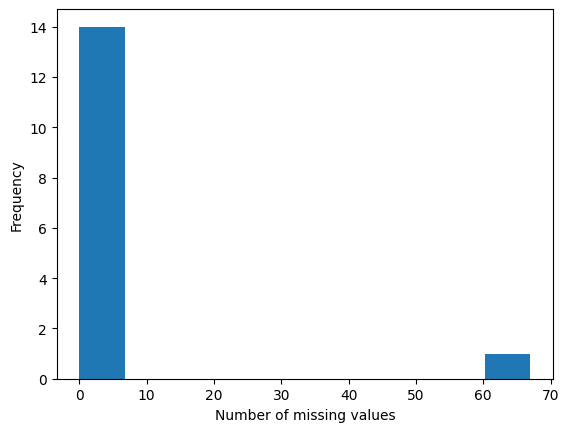

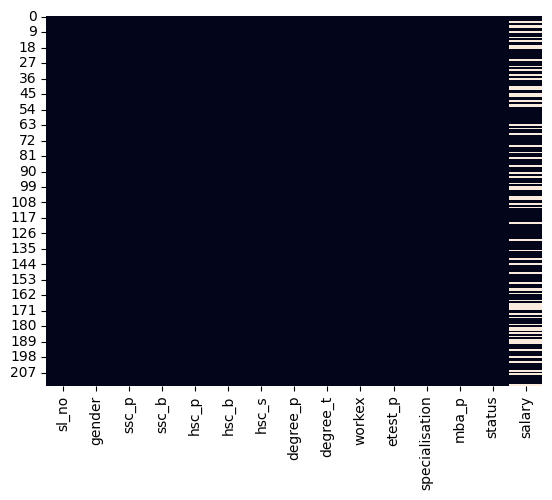

In [129]:
# Identify Missing Values:
# Analyze the distribution of missing values (random, concentrated).

# Check for missing values
missing_values = data.isnull().sum()

# Print the number of missing values per column
print(missing_values)

# Use visualization techniques like histograms or heatmaps
import matplotlib.pyplot as plt

# Histogram of missing values
plt.hist(missing_values)
plt.xlabel("Number of missing values")
plt.ylabel("Frequency")
plt.show()

# Heatmap of missing values
import seaborn as sns

sns.heatmap(data.isnull(), cbar=False)
plt.show()


So , 67 people not placed


In [130]:
print(data)

     sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1       0  67.00   Others  91.00   Others  Commerce     58.00   
1        2       0  79.33  Central  78.33   Others   Science     77.48   
2        3       0  65.00  Central  68.00  Central      Arts     64.00   
3        4       0  56.00  Central  52.00  Central   Science     52.00   
4        5       0  85.80  Central  73.60  Central  Commerce     73.30   
..     ...     ...    ...      ...    ...      ...       ...       ...   
210    211       0  80.60   Others  82.00   Others  Commerce     77.60   
211    212       0  58.00   Others  60.00   Others   Science     72.00   
212    213       0  67.00   Others  67.00   Others  Commerce     73.00   
213    214       1  74.00   Others  66.00   Others  Commerce     58.00   
214    215       0  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0    

In [131]:
# Dropping slary as it's not needeed to predict status
salary_data = data['salary'].copy()
data.drop('salary', axis=1, inplace=True)


print(data)
print(salary_data)

     sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1       0  67.00   Others  91.00   Others  Commerce     58.00   
1        2       0  79.33  Central  78.33   Others   Science     77.48   
2        3       0  65.00  Central  68.00  Central      Arts     64.00   
3        4       0  56.00  Central  52.00  Central   Science     52.00   
4        5       0  85.80  Central  73.60  Central  Commerce     73.30   
..     ...     ...    ...      ...    ...      ...       ...       ...   
210    211       0  80.60   Others  82.00   Others  Commerce     77.60   
211    212       0  58.00   Others  60.00   Others   Science     72.00   
212    213       0  67.00   Others  67.00   Others  Commerce     73.00   
213    214       1  74.00   Others  66.00   Others  Commerce     58.00   
214    215       0  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status  
0     Sci&Tech     No     55.0         Mkt&H

#changing datatype

changing categorical data to numerical data for ease of our working

In [132]:
#converting categorical data stautus to numerical data where placed =1 and not paced = 0

data['status'] = data['status'].apply(lambda x: 1 if x == 'Placed' else 0)
print(data)

     sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1       0  67.00   Others  91.00   Others  Commerce     58.00   
1        2       0  79.33  Central  78.33   Others   Science     77.48   
2        3       0  65.00  Central  68.00  Central      Arts     64.00   
3        4       0  56.00  Central  52.00  Central   Science     52.00   
4        5       0  85.80  Central  73.60  Central  Commerce     73.30   
..     ...     ...    ...      ...    ...      ...       ...       ...   
210    211       0  80.60   Others  82.00   Others  Commerce     77.60   
211    212       0  58.00   Others  60.00   Others   Science     72.00   
212    213       0  67.00   Others  67.00   Others  Commerce     73.00   
213    214       1  74.00   Others  66.00   Others  Commerce     58.00   
214    215       0  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p  status  
0     Sci&Tech     No     55.0         Mkt&HR  5

In [133]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Encode categorical variables
categorical_data = data.select_dtypes(exclude=[np.number])
encoded_data = pd.get_dummies(categorical_data)

# Combine numeric and encoded categorical data
processed_data = pd.concat([numeric_data, encoded_data], axis=1)


# Separate features and target
target = processed_data['status']
features = processed_data.drop('status', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Print the shapes of the training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (172, 21)
Shape of X_test: (43, 21)
Shape of y_train: (172,)
Shape of y_test: (43,)


# **Best Parameters**

Iterating over different learning rates and number of estimators to find the best combination

Learning rate: 0.01, n_estimators: 50, Accuracy: 0.7674
Learning rate: 0.01, n_estimators: 100, Accuracy: 0.8140
Learning rate: 0.01, n_estimators: 150, Accuracy: 0.7907
Learning rate: 0.01, n_estimators: 200, Accuracy: 0.7907
Learning rate: 0.1, n_estimators: 50, Accuracy: 0.8372
Learning rate: 0.1, n_estimators: 100, Accuracy: 0.8140
Learning rate: 0.1, n_estimators: 150, Accuracy: 0.8372
Learning rate: 0.1, n_estimators: 200, Accuracy: 0.8140
Learning rate: 0.2, n_estimators: 50, Accuracy: 0.8605
Learning rate: 0.2, n_estimators: 100, Accuracy: 0.8140
Learning rate: 0.2, n_estimators: 150, Accuracy: 0.7907
Learning rate: 0.2, n_estimators: 200, Accuracy: 0.7907
Learning rate: 0.3, n_estimators: 50, Accuracy: 0.7907
Learning rate: 0.3, n_estimators: 100, Accuracy: 0.7907
Learning rate: 0.3, n_estimators: 150, Accuracy: 0.7907
Learning rate: 0.3, n_estimators: 200, Accuracy: 0.7907
Best accuracy: 0.8605
Best parameters: (0.2, 50)


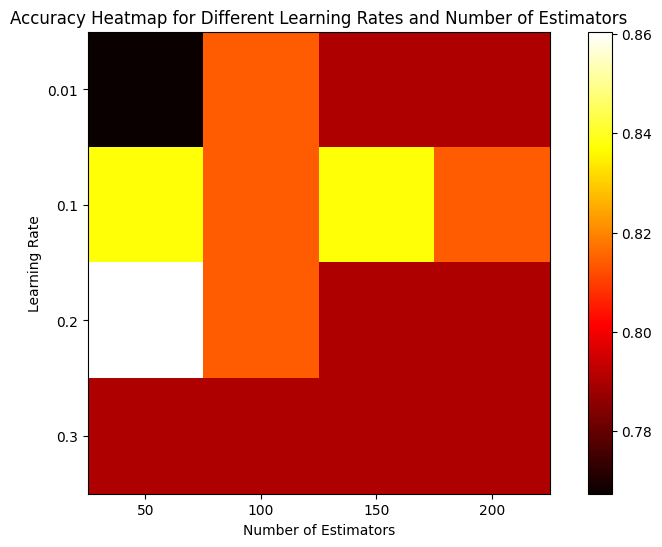

In [134]:
# Iterate over different learning rates and number of estimators to find the best combination
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Initialize lists to store accuracy values
accuracies = []
params_list = []

for learning_rate in [0.01, 0.1, 0.2, 0.3]:
    for n_estimators in [50, 100, 150, 200]:

        gb_model = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_estimators, random_state=42)
        gb_model.fit(X_train, y_train)

        y_pred = gb_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        params_list.append((learning_rate, n_estimators))

        print(f"Learning rate: {learning_rate}, n_estimators: {n_estimators}, Accuracy: {accuracy:.4f}")

# Find the index of the best accuracy
best_accuracy_index = accuracies.index(max(accuracies))
best_params = params_list[best_accuracy_index]

# Print the best accuracy and parameters
print(f"Best accuracy: {accuracies[best_accuracy_index]:.4f}")
print(f"Best parameters: {best_params}")

# Reshape accuracies list for plotting
accuracies_array = np.array(accuracies).reshape(4, 4)

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(accuracies_array, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel('Number of Estimators')
plt.ylabel('Learning Rate')
plt.xticks(range(len([50, 100, 150, 200])), [50, 100, 150, 200])
plt.yticks(range(len([0.01, 0.1, 0.2, 0.3])), [0.01, 0.1, 0.2, 0.3])
plt.title('Accuracy Heatmap for Different Learning Rates and Number of Estimators')
plt.show()


In [135]:
#now train and save the model using best parameters

best_learning_rate, best_n_estimators = best_params
gb_model = GradientBoostingClassifier(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
gb_model.fit(X_train, y_train)

# Save the model to a file
import pickle
with open('/content/drive/MyDrive/Ineuron/crp_gb_model.pkl', 'wb') as file:
  pickle.dump(gb_model, file)


In [136]:
# Load the model from the file
with open('/content/drive/MyDrive/Ineuron/crp_gb_model.pkl', 'rb') as file:
  gb_model = pickle.load(file)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Print the predictions
print(y_pred)


[1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1]


In [137]:
print(data)

     sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1       0  67.00   Others  91.00   Others  Commerce     58.00   
1        2       0  79.33  Central  78.33   Others   Science     77.48   
2        3       0  65.00  Central  68.00  Central      Arts     64.00   
3        4       0  56.00  Central  52.00  Central   Science     52.00   
4        5       0  85.80  Central  73.60  Central  Commerce     73.30   
..     ...     ...    ...      ...    ...      ...       ...       ...   
210    211       0  80.60   Others  82.00   Others  Commerce     77.60   
211    212       0  58.00   Others  60.00   Others   Science     72.00   
212    213       0  67.00   Others  67.00   Others  Commerce     73.00   
213    214       1  74.00   Others  66.00   Others  Commerce     58.00   
214    215       0  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p  status  
0     Sci&Tech     No     55.0         Mkt&HR  5

#Salary Prediction

now we are trying to predict the salary of placed students.

In [138]:
# prompt: add salary back to data

data['salary'] = salary_data
print(data)


     sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1       0  67.00   Others  91.00   Others  Commerce     58.00   
1        2       0  79.33  Central  78.33   Others   Science     77.48   
2        3       0  65.00  Central  68.00  Central      Arts     64.00   
3        4       0  56.00  Central  52.00  Central   Science     52.00   
4        5       0  85.80  Central  73.60  Central  Commerce     73.30   
..     ...     ...    ...      ...    ...      ...       ...       ...   
210    211       0  80.60   Others  82.00   Others  Commerce     77.60   
211    212       0  58.00   Others  60.00   Others   Science     72.00   
212    213       0  67.00   Others  67.00   Others  Commerce     73.00   
213    214       1  74.00   Others  66.00   Others  Commerce     58.00   
214    215       0  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p  status    salary  
0     Sci&Tech     No     55.0        

In [139]:
# prompt: drop nan values from data

data.dropna(inplace=True)
print(data)

     sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1       0  67.00   Others  91.00   Others  Commerce     58.00   
1        2       0  79.33  Central  78.33   Others   Science     77.48   
2        3       0  65.00  Central  68.00  Central      Arts     64.00   
4        5       0  85.80  Central  73.60  Central  Commerce     73.30   
7        8       0  82.00  Central  64.00  Central   Science     66.00   
..     ...     ...    ...      ...    ...      ...       ...       ...   
209    210       0  62.00  Central  72.00  Central  Commerce     65.00   
210    211       0  80.60   Others  82.00   Others  Commerce     77.60   
211    212       0  58.00   Others  60.00   Others   Science     72.00   
212    213       0  67.00   Others  67.00   Others  Commerce     73.00   
213    214       1  74.00   Others  66.00   Others  Commerce     58.00   

      degree_t workex  etest_p specialisation  mba_p  status    salary  
0     Sci&Tech     No     55.0        

In [140]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Encode categorical variables
categorical_data = data.select_dtypes(exclude=[np.number])
encoded_data = pd.get_dummies(categorical_data)

# Combine numeric and encoded categorical data
processed_data = pd.concat([numeric_data, encoded_data], axis=1)

#no need of status now
processed_data = processed_data.drop('status', axis=1)


# Separate features and target
target = processed_data['salary']
features = processed_data.drop('salary', axis=1)

# Split data into training and testing sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(features, target, test_size=0.2, random_state=42)


# Print the shapes of the training and testing sets
print(f"Shape of X_train: {X_train_s.shape}")
print(f"Shape of X_test: {X_test_s.shape}")
print(f"Shape of y_train: {y_train_s.shape}")
print(f"Shape of y_test: {y_test_s.shape}")

Shape of X_train: (118, 21)
Shape of X_test: (30, 21)
Shape of y_train: (118,)
Shape of y_test: (30,)


In [141]:
# prompt: train best model for salary prediction

# Train a Gradient Boosting Regressor model
gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
gb_model.fit(X_train_s, y_train_s)

# Save the model to a file
with open('/content/drive/MyDrive/Ineuron/crp_gb_salary_model.pkl', 'wb') as file:
  pickle.dump(gb_model, file)

# Load the model from the file
with open('/content/drive/MyDrive/Ineuron/crp_gb_salary_model.pkl', 'rb') as file:
  gb_model = pickle.load(file)

# Make predictions on the test data
y_pred_s = gb_model.predict(X_test_s)

# Print the predictions
print(y_pred_s)


[360000. 300000. 275000. 300000. 252000. 278000. 250000. 300000. 240000.
 300000. 300000. 250000. 290000. 210000. 393000. 240000. 250000. 300000.
 285000. 300000. 287000. 300000. 500000. 300000. 300000. 300000. 300000.
 264000. 240000. 278000.]


In [142]:
# prompt: take rndom index from x_test and predict status if status = 1 then predict salary

import random

# Select a random index from X_test
random_index = random.randint(0, len(X_test) - 1)

# Get the features of the selected instance
selected_features = X_test.iloc[random_index]

# Get the salary prediction model
with open('/content/drive/MyDrive/Ineuron/crp_gb_model.pkl', 'rb') as file:
    gb_model = pickle.load(file)
# Predict the status

predicted_status = gb_model.predict([selected_features])[0]

# If the status is "Placed", predict the salary
if predicted_status == 1:
  # Get the salary prediction model
  with open('/content/drive/MyDrive/Ineuron/crp_gb_salary_model.pkl', 'rb') as file:
    gb_model_salary = pickle.load(file)

  # Predict the salary
  predicted_salary = gb_model_salary.predict([selected_features])[0]

  # Print the results
  print(f"Predicted status: Placed")
  print(f"Predicted salary: {predicted_salary}")
else:
  print(f"Predicted status: Not Placed")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Predicted status: Placed
Predicted salary: 300000.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
